<a href="https://colab.research.google.com/github/subham-28/ML_Projects/blob/main/Food_Delivery_Time_Prediction/notebooks/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
file_path = '/content/drive/MyDrive/food_delivery_time_prediction/swiggy.csv'

In [ ]:
df=pd.read_csv('swiggy.csv')

In [ ]:
df.sample(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
5731,0x4bd,HYDRES15DEL02,NaN,NaN,17.459710,78.368855,17.539710,78.448855,29-03-2022,NaN,23:05:00,conditions NaN,NaN,3,Meal,electric_scooter,0,NaN,Metropolitian,(min) 10
19184,0x7e3d,JAPRES16DEL03,30,4.7,26.849596,75.800512,26.909596,75.860512,09-03-2022,17:40:00,17:50:00,conditions Windy,Medium,2,Meal,scooter,1,No,Urban,(min) 34
13153,0x5a76,HYDRES11DEL02,23,4.4,17.430448,78.418213,17.450448,78.438213,03-04-2022,10:45:00,10:55:00,conditions Stormy,Low,0,Snack,motorcycle,1,No,Metropolitian,(min) 24
24443,0x3134,VADRES12DEL02,25,4.9,0.000000,0.000000,0.130000,0.130000,02-03-2022,18:30:00,18:45:00,conditions Stormy,Medium,0,Snack,motorcycle,1,No,Metropolitian,(min) 30
37036,0x54d5,VADRES18DEL03,37,4.7,0.000000,0.000000,0.060000,0.060000,19-03-2022,18:50:00,18:55:00,conditions Sandstorms,Medium,0,Drinks,motorcycle,1,No,Metropolitian,(min) 30


In [ ]:
df.shape

(45593, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [ ]:
df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,0


In [ ]:
df.sample(50)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
39100,0xa324,COIMBRES12DEL01,32,4.8,11.000762,76.981876,11.010762,76.991876,30-03-2022,08:10:00,08:25:00,conditions Cloudy,Low,2,Snack,scooter,1,No,Metropolitian,(min) 19
10793,0x63b3,BANGRES14DEL03,31,4.7,12.949934,77.699386,12.979934,77.729386,05-04-2022,19:10:00,19:20:00,conditions Sandstorms,Jam,2,Drinks,scooter,1,No,Metropolitian,(min) 27
35009,0x41d0,COIMBRES08DEL02,31,4.8,11.001852,76.976268,11.021852,76.996268,05-04-2022,11:20:00,11:25:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 30
18815,0xc289,ALHRES15DEL02,39,4,25.449872,81.836167,25.579872,81.966167,18-02-2022,20:30:00,20:40:00,conditions Windy,Jam,0,Snack,motorcycle,2,No,Metropolitian,(min) 41
17940,0x4a1a,VADRES03DEL02,36,4.6,22.320000,73.170000,22.370000,73.220000,26-03-2022,23:55:00,00:10:00,conditions Sandstorms,Low,1,Snack,scooter,0,No,Urban,(min) 23
13526,0x582c,MUMRES12DEL01,36,4.7,19.207222,72.972281,19.277222,73.042281,18-03-2022,19:30:00,19:45:00,conditions Fog,Jam,2,Buffet,motorcycle,2,No,Metropolitian,(min) 42
1711,0xb0f4,COIMBRES01DEL01,39,3.6,11.016298,76.972076,11.126298,77.082076,18-03-2022,22:15:00,22:25:00,conditions Cloudy,Low,2,Snack,motorcycle,0,No,Metropolitian,(min) 35
45353,0x8760,COIMBRES17DEL03,34,4.9,11.026117,76.944652,11.086117,77.004652,28-03-2022,18:30:00,18:35:00,conditions Sunny,Medium,1,Drinks,motorcycle,0,No,Metropolitian,(min) 17
26916,0xd18a,KNPRES07DEL01,25,4.7,26.472001,80.354002,26.512001,80.394002,13-02-2022,14:30:00,14:35:00,conditions Stormy,High,1,Drinks,scooter,0,No,Metropolitian,(min) 22
11180,0xbeb7,RANCHIRES16DEL03,34,4.9,23.371292,85.327872,23.431292,85.387872,05-03-2022,17:40:00,17:55:00,conditions Sunny,Medium,1,Snack,scooter,1,No,Metropolitian,(min) 24


Missing values are hidden in form of string Nan

In [ ]:
df.loc[583,'Delivery_person_Age']

'NaN '

In [ ]:
(df=="NaN ").sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,1854
Delivery_person_Ratings,1908
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1731


Weather_condition col has missing value in form of condition_NaN we need to handle it separately

In [ ]:
df.replace('NaN ', np.nan, inplace=True)

In [ ]:
df.isnull().sum().sum()

np.int64(8515)

Find the missing values in the weather col

In [ ]:
df.replace(
    to_replace=r'(?i)conditions\s*nan\s*',  # (?i) = case-insensitive
    value=np.nan,
    regex=True,
    inplace=True
)

In [ ]:
df.isna().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,1854
Delivery_person_Ratings,1908
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1731


Checking the pattern of missingness

<Axes: >

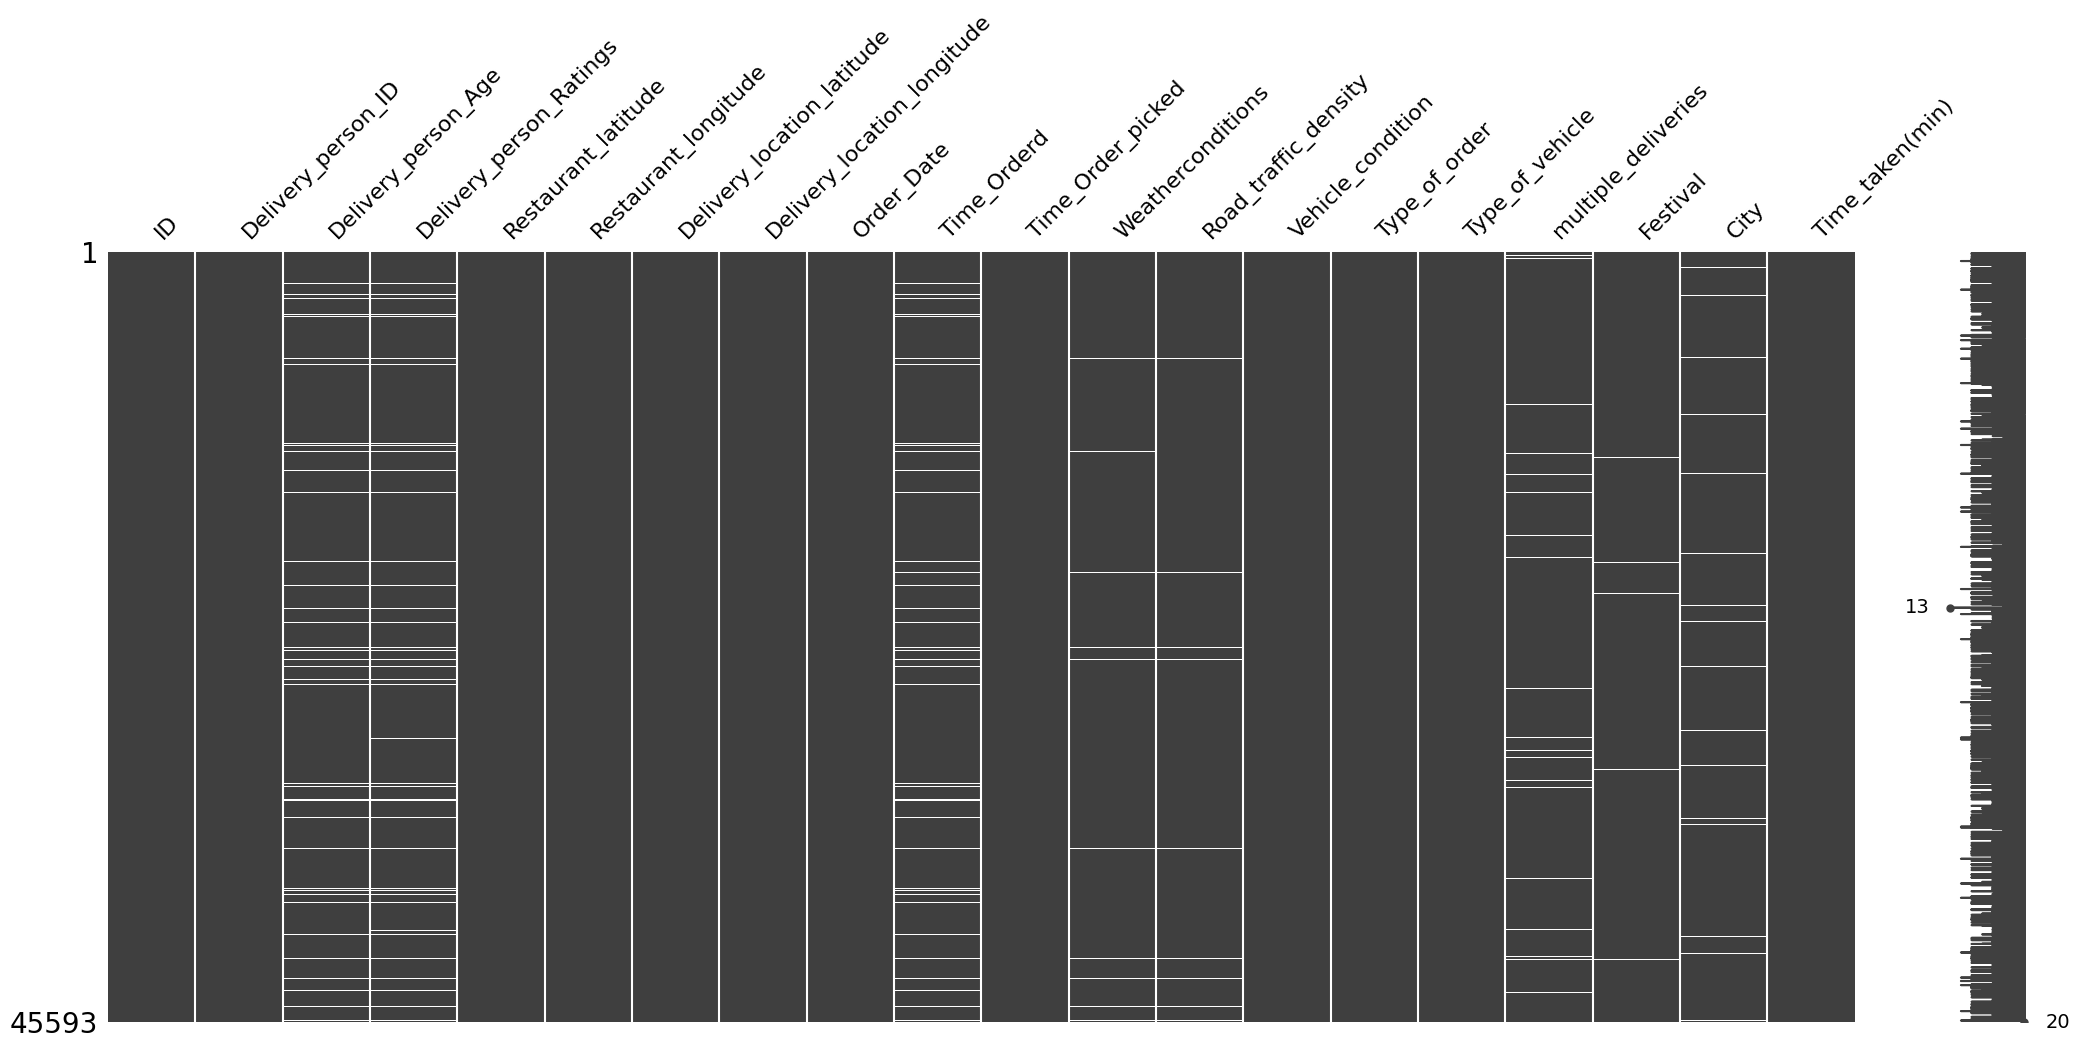

In [ ]:
msno.matrix(df)

<Axes: >

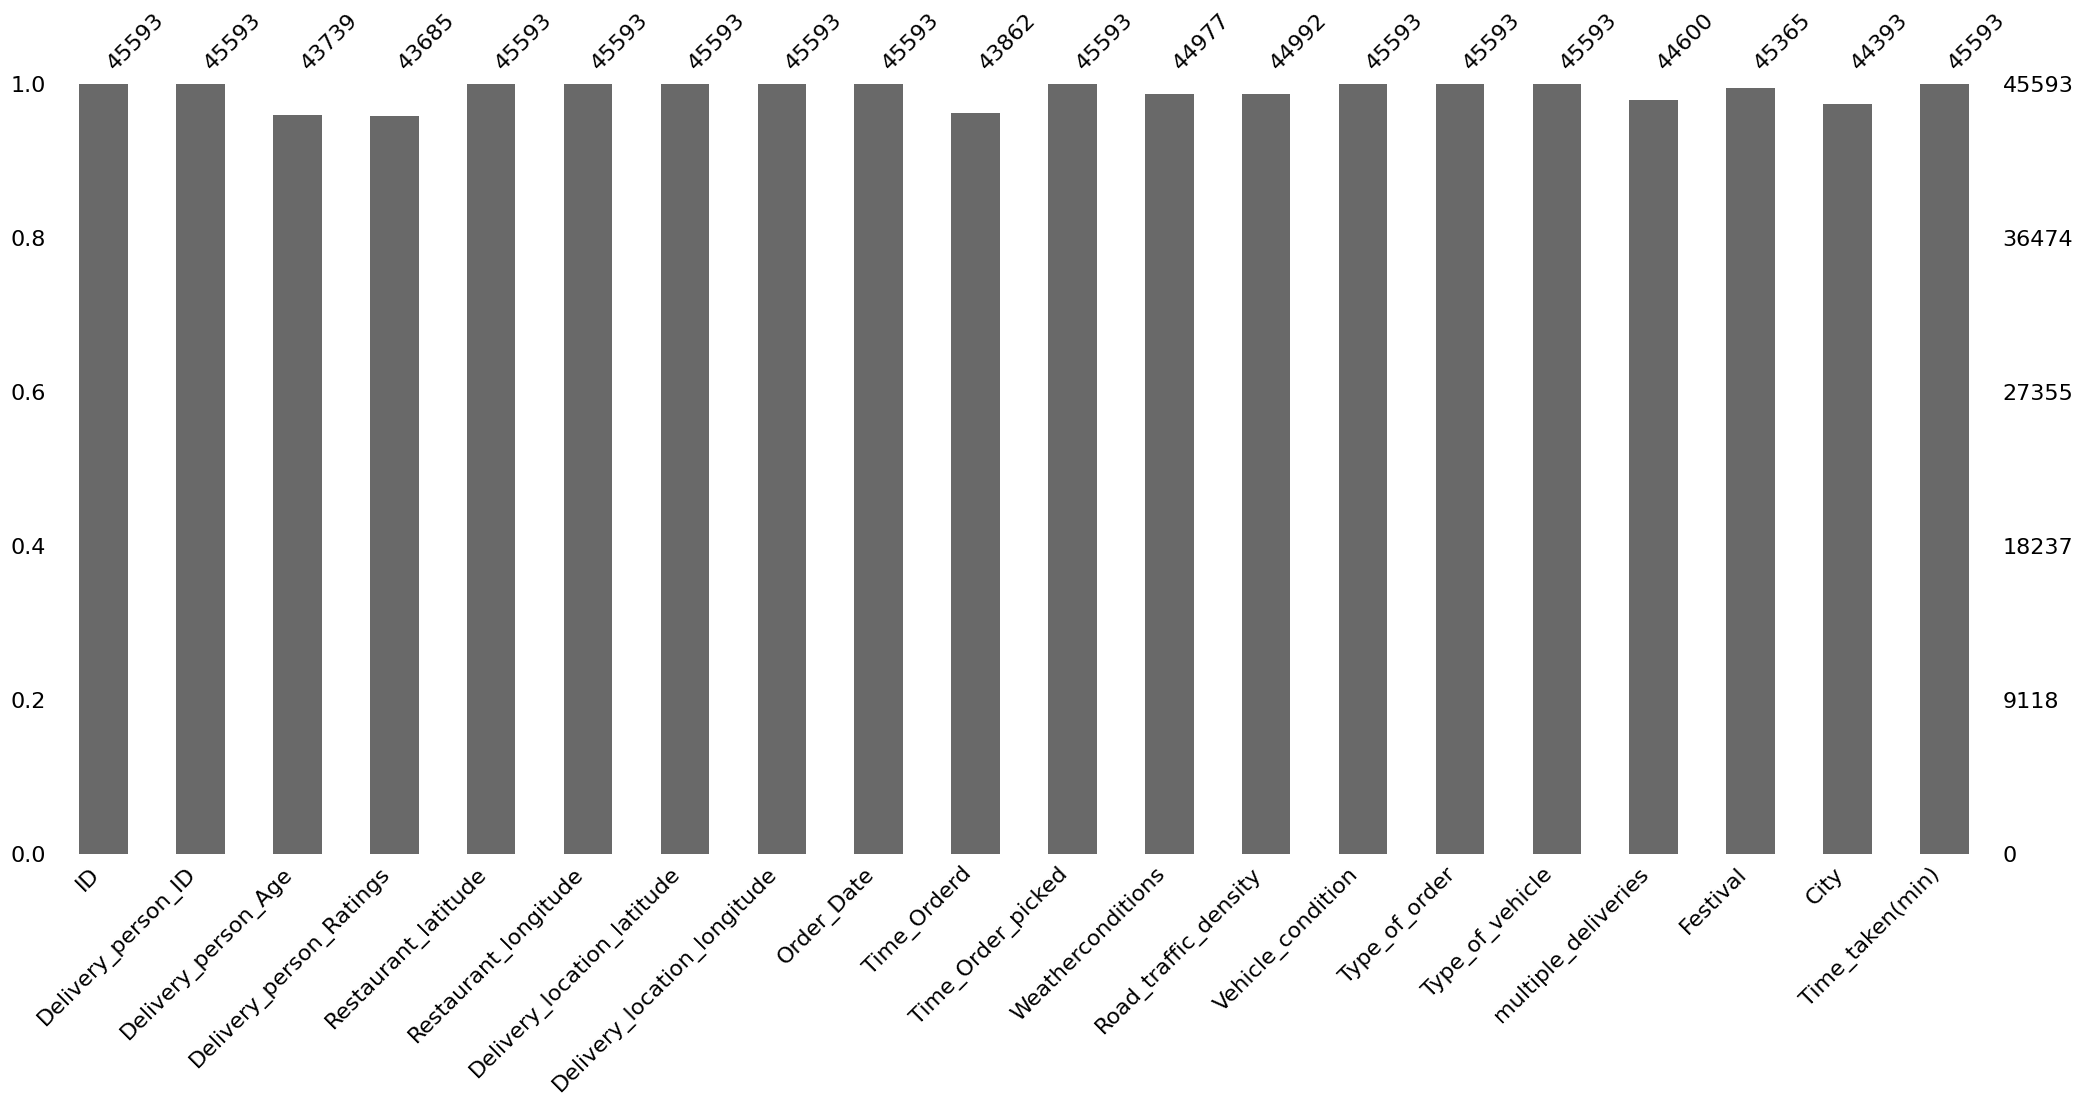

In [ ]:
msno.bar(df)

<Axes: >

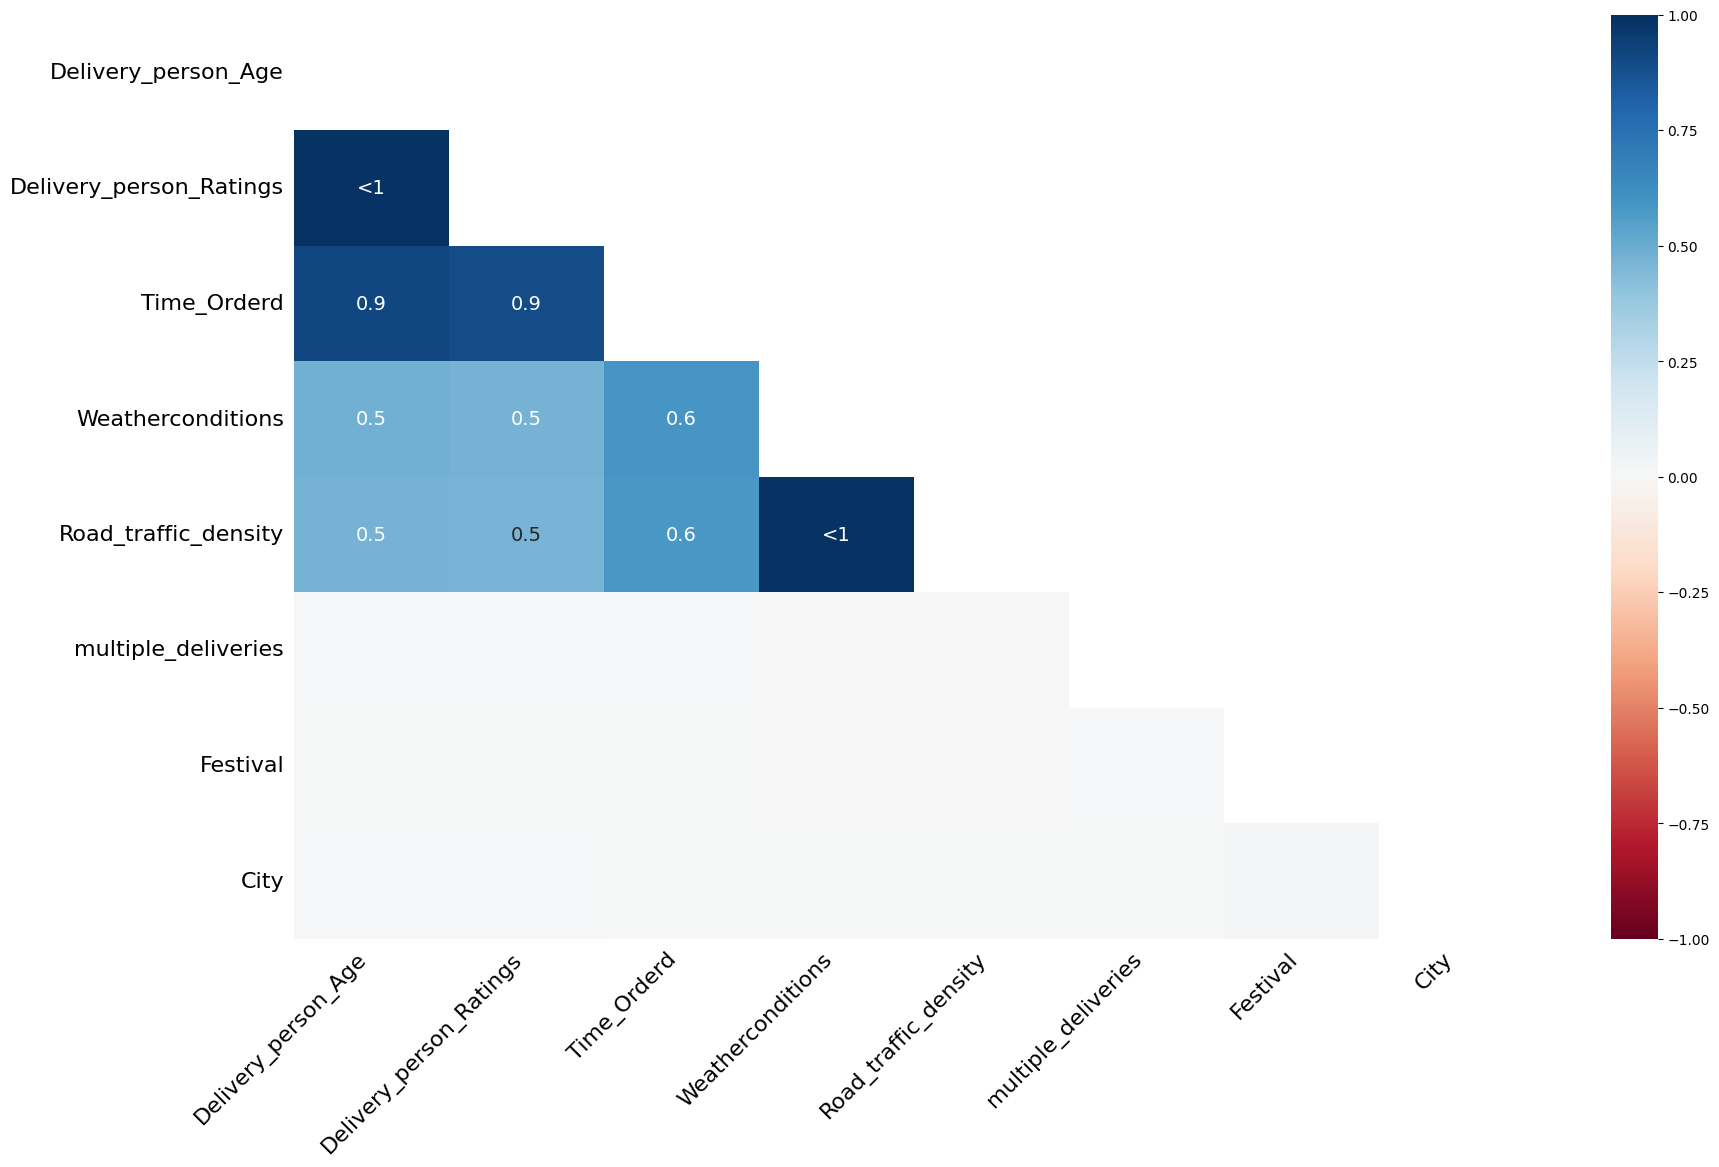

In [ ]:
msno.heatmap(df)

Simplification of col names

In [ ]:
def change_column_names(data: pd.DataFrame):
    return (
        data.rename(str.lower,axis=1)
        .rename({
            "delivery_person_id" : "rider_id",
            "delivery_person_age": "age",
            "delivery_person_ratings": "ratings",
            "delivery_location_latitude": "delivery_latitude",
            "delivery_location_longitude": "delivery_longitude",
            "time_orderd": "order_time",
            "time_order_picked": "order_picked_time",
            "weatherconditions": "weather",
            "road_traffic_density": "traffic",
            "city": "city_type",
            "time_taken(min)": "time_taken"},axis=1)
    )

In [ ]:
df= change_column_names(df)

In [ ]:
df.head()

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


**RIDER**

In [ ]:
df['rider_id'].value_counts()

,count
rider_id,
PUNERES01DEL01,67
JAPRES11DEL02,67
VADRES08DEL02,66
RANCHIRES02DEL01,66
HYDRES04DEL02,66
...,...
BHPRES15DEL03,7
GOARES01DEL03,7
KOLRES09DEL03,6


Extract the city name from the rider_id

In [ ]:
(
    df['rider_id'].str.split('RES').str.get(0).rename('City_Name')
)


,City_Name
0,INDO
1,BANG
2,BANG
3,COIMB
4,CHEN
...,...
45588,JAP
45589,AGR
45590,CHEN
45591,COIMB


**AGE**

In [ ]:
df['age'].dtype

dtype('O')

In [ ]:
df['age'].astype(float).describe()

,age
count,43739.000000
mean,29.567137
std,5.815155
min,15.000000
25%,25.000000
50%,30.000000
75%,35.000000
max,50.000000


The minimum rider age 15 is problematic. We need to check the details of these riders

In [ ]:
minor_data=df[df['age'].astype('float') < 18]
minor_data

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
2387,0x564,JAPRES15DEL03,15,1,-26.891191,75.802083,26.981191,75.892083,12-03-2022,NaN,17:20:00,NaN,NaN,3,Meal,motorcycle,0,No,Urban,(min) 15
2905,0xcd0,INDORES010DEL03,15,1,22.750040,75.902847,22.810040,75.962847,03-04-2022,NaN,20:30:00,NaN,NaN,3,Snack,scooter,1,No,Metropolitian,(min) 29
2951,0x91a,SURRES17DEL03,15,1,21.149569,72.772697,21.209569,72.832697,21-03-2022,NaN,22:10:00,NaN,NaN,3,Buffet,bicycle,1,No,Metropolitian,(min) 20
5902,0x474,CHENRES15DEL03,15,1,13.026286,80.275235,13.056286,80.305235,11-03-2022,NaN,20:50:00,NaN,NaN,3,Drinks,bicycle,1,No,Metropolitian,(min) 25
9156,0x73f,BANGRES05DEL01,15,1,12.970324,77.645748,13.080324,77.755748,25-03-2022,NaN,23:25:00,NaN,NaN,3,Buffet,motorcycle,2,No,Metropolitian,(min) 34
10900,0x1b49,MUMRES14DEL02,15,1,19.181300,72.836191,19.231300,72.886191,30-03-2022,NaN,20:55:00,NaN,NaN,3,Buffet,motorcycle,1,No,Metropolitian,(min) 39
11125,0x40b,SURRES12DEL01,15,1,-21.183434,-72.814492,21.193434,72.824492,05-03-2022,NaN,11:30:00,NaN,NaN,3,Meal,scooter,1,No,Urban,(min) 27
12093,0x523,INDORES03DEL02,15,1,22.751857,75.866699,22.801857,75.916699,24-03-2022,NaN,21:15:00,NaN,NaN,3,Buffet,bicycle,0,No,Metropolitian,(min) 28
15124,0x18b0,RANCHIRES02DEL01,15,1,0.000000,0.000000,0.070000,0.070000,16-03-2022,NaN,23:55:00,NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 21
15927,0x550,CHENRES08DEL02,15,1,13.022394,80.242439,13.072394,80.292439,11-03-2022,NaN,18:10:00,NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 17




1.   The star rating of all are 1
2.   vehicle cond is 3 which is very bad
3.   many cols are missing values
4.   only riders are of age 15 no 16 17 age available
5.   lattitude and longitude are neagtive which is not possible



In [ ]:
minor_index = minor_data.index.tolist()
len(minor_index)

38

It is better to remove these rows for better clarification

**RATINGS**

In [ ]:
df['ratings'].dtype

dtype('O')

In [ ]:
df['ratings'].astype(float).describe()

,ratings
count,43685.000000
mean,4.633780
std,0.334716
min,1.000000
25%,4.500000
50%,4.700000
75%,4.900000
max,6.000000


6 star rating is not possible

<Axes: ylabel='ratings'>

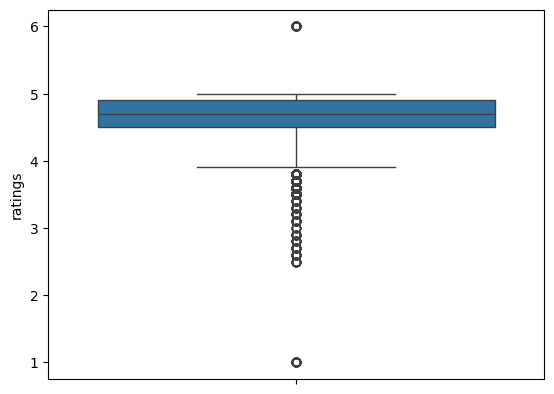

In [ ]:
sns.boxplot(df['ratings'].astype(float))

In [ ]:
six_star_data= df[df['ratings'].astype(float) == 6]
len(six_star_data)

53

In [ ]:
six_star_data

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
3586,0x46d,BANGRES05DEL01,50,6,-12.970324,-77.645748,13.010324,77.685748,13-03-2022,NaN,12:30:00,NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 25
4714,0x493,HYDRES17DEL01,50,6,-17.451976,-78.385883,17.561976,78.495883,04-04-2022,NaN,23:20:00,NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 27
5169,0x4f2,JAPRES08DEL01,50,6,-26.910262,-75.783013,27.020262,75.893013,18-03-2022,NaN,18:50:00,NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20
5362,0x430,BANGRES19DEL01,50,6,12.914264,77.678400,13.024264,77.788400,06-04-2022,NaN,20:55:00,NaN,NaN,3,Meal,electric_scooter,1,No,Metropolitian,(min) 18
5651,0xbef1,AGRRES13DEL02,50,6,-27.159795,-78.042990,27.209795,78.092990,13-02-2022,NaN,18:05:00,NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20
6394,0x427,JAPRES06DEL02,50,6,26.911927,75.797282,27.041927,75.927282,02-04-2022,NaN,22:10:00,NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 20
7031,0x3eb,MYSRES15DEL02,50,6,-12.352058,-76.606650,12.372058,76.626650,15-03-2022,NaN,10:00:00,NaN,NaN,3,Buffet,scooter,1,No,Metropolitian,(min) 14
7681,0xd42,VADRES09DEL01,50,6,0.000000,0.000000,0.010000,0.010000,21-03-2022,NaN,08:35:00,NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 22
9499,0x3f0,BANGRES010DEL01,50,6,12.933298,77.614293,13.003298,77.684293,12-03-2022,NaN,18:25:00,NaN,NaN,3,Drinks,scooter,1,No,Urban,(min) 17
9535,0x3ef,RANCHIRES13DEL01,50,6,-23.374989,-85.335486,23.444989,85.405486,20-03-2022,NaN,17:55:00,NaN,NaN,3,Snack,bicycle,1,No,Metropolitian,(min) 32


In [ ]:
six_star_index = six_star_data.index.tolist()
len(six_star_index)

53

**LOCATION COLS**

In [ ]:
location_cols= df.columns[4:8].tolist()
location_cols

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude']

In [ ]:
location_subset = df.loc[:,location_cols]
location_subset

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
0,22.745049,75.892471,22.765049,75.912471
1,12.913041,77.683237,13.043041,77.813237
2,12.914264,77.678400,12.924264,77.688400
3,11.003669,76.976494,11.053669,77.026494
4,12.972793,80.249982,13.012793,80.289982
...,...,...,...,...
45588,26.902328,75.794257,26.912328,75.804257
45589,0.000000,0.000000,0.070000,0.070000
45590,13.022394,80.242439,13.052394,80.272439
45591,11.001753,76.986241,11.041753,77.026241


**Valid values for lat and long**

 > India lies to the north of the equator between `6° 44′` and `35° 30′` north latitude and `68° 7′` and `97° 25′` east longitude.

In [ ]:
location_subset.describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702
std,8.185109,22.883647,7.335122,21.118812
min,-30.905562,-88.366217,0.010000,0.010000
25%,12.933284,73.170000,12.988453,73.280000
50%,18.546947,75.898497,18.633934,76.002574
75%,22.728163,78.044095,22.785049,78.107044
max,30.914057,88.433452,31.054057,88.563452


In [ ]:
lower_bound_lat=6.44
lower_bound_long=68.70

In [ ]:
location_subset.loc[
    (df['delivery_latitude'] < lower_bound_lat) |
    (df['delivery_longitude'] < lower_bound_long) |
    (df['restaurant_latitude'] < lower_bound_lat) |
    (df['restaurant_longitude'] < lower_bound_long)
].sample(50)

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
12586,0.000000,0.000000,0.060000,0.060000
27919,-19.103249,72.846749,19.143249,72.886749
33888,0.000000,0.000000,0.130000,0.130000
43541,0.000000,0.000000,0.110000,0.110000
5530,0.000000,0.000000,0.130000,0.130000
17556,0.000000,0.000000,0.090000,0.090000
37454,0.000000,0.000000,0.050000,0.050000
28704,0.000000,0.000000,0.080000,0.080000
27034,0.000000,0.000000,0.050000,0.050000
1287,0.000000,0.000000,0.040000,0.040000


In [ ]:
location_subset.loc[
    (df['delivery_latitude'] < lower_bound_lat) |
    (df['delivery_longitude'] < lower_bound_long) |
    (df['restaurant_latitude'] < lower_bound_lat) |
    (df['restaurant_longitude'] < lower_bound_long)
].describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,4071.000000,4071.000000,4071.000000,4071.000000
mean,-2.149416,2.068601,2.212538,8.299885
std,6.537913,25.270676,6.538283,23.980011
min,-30.905562,-88.366217,0.010000,0.010000
25%,0.000000,0.000000,0.040000,0.040000
50%,0.000000,0.000000,0.070000,0.070000
75%,0.000000,0.000000,0.110000,0.110000
max,0.000000,88.433452,31.045562,88.523452


restaurant_latitude has max vakue as 0 how??

(array([1, 2, 3, 4]),
 [Text(1, 0, 'restaurant_latitude'),
  Text(2, 0, 'restaurant_longitude'),
  Text(3, 0, 'delivery_latitude'),
  Text(4, 0, 'delivery_longitude')])

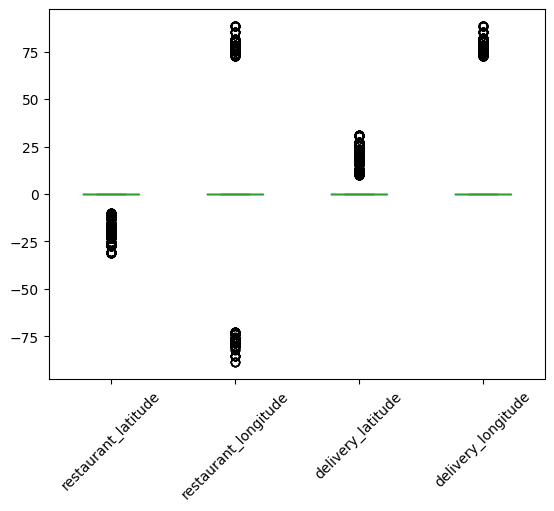

In [ ]:
location_subset.loc[
    (df['delivery_latitude'] < lower_bound_lat) |
    (df['delivery_longitude'] < lower_bound_long) |
    (df['restaurant_latitude'] < lower_bound_lat) |
    (df['restaurant_longitude'] < lower_bound_long)
].plot(kind='box')

plt.xticks(rotation=45)

Correct the negative values by taking absolute vals of those

[Text(1, 0, 'restaurant_latitude'),
 Text(2, 0, 'restaurant_longitude'),
 Text(3, 0, 'delivery_latitude'),
 Text(4, 0, 'delivery_longitude')]

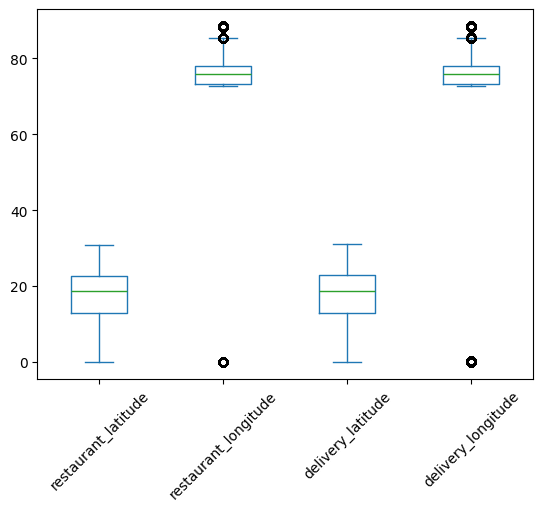

In [ ]:
(
    location_subset.abs().plot(kind='box')
)
ax=plt.gca()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [ ]:
# number of rows after taking absolute values

(
    location_subset.abs()
    .loc[lambda df_:
        (df_['restaurant_latitude'] < lower_bound_lat) |
        (df_['restaurant_longitude'] < lower_bound_long) |
        (df_['delivery_latitude'] < lower_bound_lat) |
        (df_['delivery_longitude'] < lower_bound_long)]
    .shape[0]

)

3640

still 3640 messy rows are there

In [ ]:
location_subset.abs().loc[lambda df_:
                        (df_['restaurant_latitude'] < 1) |
                        (df_['restaurant_longitude'] < 1) |
                        (df_['delivery_latitude'] < 1) |
                        (df_['delivery_longitude'] < 1)]

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
33,0.0,0.0,0.11,0.11
52,0.0,0.0,0.03,0.03
57,0.0,0.0,0.08,0.08
59,0.0,0.0,0.06,0.06
67,0.0,0.0,0.02,0.02
...,...,...,...,...
45569,0.0,0.0,0.07,0.07
45576,0.0,0.0,0.13,0.13
45577,0.0,0.0,0.09,0.09
45579,0.0,0.0,0.05,0.05


In [ ]:
def clean_lat_long(data: pd.DataFrame, threshold=1):
    location_columns = location_subset.columns.tolist()

    return (
        data
        .assign(**{
            col: (
                np.where(data[col] < threshold, np.nan, data[col].values)
            )
            for col in location_columns
        })
    )

In [ ]:
clean_lat_long(df).isna().sum()

,0
id,0
rider_id,0
age,1854
ratings,1908
restaurant_latitude,4071
restaurant_longitude,3802
delivery_latitude,3640
delivery_longitude,3640
order_date,0
order_time,1731


**ORDER DATE**

In [ ]:
df['order_date'].isna().sum()

np.int64(0)

In [ ]:
df['order_date'].unique()

array(['19-03-2022', '25-03-2022', '05-04-2022', '26-03-2022',
       '11-03-2022', '04-03-2022', '14-03-2022', '20-03-2022',
       '12-02-2022', '13-02-2022', '14-02-2022', '02-04-2022',
       '01-03-2022', '16-03-2022', '15-02-2022', '10-03-2022',
       '27-03-2022', '12-03-2022', '01-04-2022', '05-03-2022',
       '11-02-2022', '08-03-2022', '03-04-2022', '30-03-2022',
       '28-03-2022', '18-03-2022', '06-04-2022', '04-04-2022',
       '24-03-2022', '09-03-2022', '02-03-2022', '13-03-2022',
       '29-03-2022', '31-03-2022', '17-03-2022', '07-03-2022',
       '15-03-2022', '16-02-2022', '03-03-2022', '18-02-2022',
       '23-03-2022', '17-02-2022', '06-03-2022', '21-03-2022'],
      dtype=object)

In [ ]:
def extract_datetime_features(ser):
  date_col=pd.to_datetime(ser,dayfirst=True)

  return(
      pd.DataFrame(
          {
              "day": date_col.dt.day,
              "month": date_col.dt.month,
              "year": date_col.dt.year,
              "day_of_week": date_col.dt.day_name(),
              "isweekend": date_col.dt.day_name().isin(['Saturday','Sunday']).astype(int)
          }
      ))

In [ ]:
extract_datetime_features(df['order_date'])

,day,month,year,day_of_week,isweekend
0,19,3,2022,Saturday,1
1,25,3,2022,Friday,0
2,19,3,2022,Saturday,1
3,5,4,2022,Tuesday,0
4,26,3,2022,Saturday,1
...,...,...,...,...,...
45588,24,3,2022,Thursday,0
45589,16,2,2022,Wednesday,0
45590,11,3,2022,Friday,0
45591,7,3,2022,Monday,0


**ORDER AND PICKUP TIME**

In [ ]:
# extract hour info from data

order_time_hr = pd.to_datetime(df.replace("NaN ",np.nan)['order_time'],format='mixed').dt.hour

order_time_hr

,order_time
0,11.0
1,19.0
2,8.0
3,18.0
4,13.0
...,...
45588,11.0
45589,19.0
45590,23.0
45591,13.0


In [ ]:
def time_of_day(ser):
    time_col = pd.to_datetime(ser,format='mixed').dt.hour

    return(
        np.select(condlist=[(ser.between(6,12,inclusive='left')),
                            (ser.between(12,17,inclusive='left')),
                            (ser.between(17,20,inclusive='left')),
                            (ser.between(20,24,inclusive='left'))],
                  choicelist=["morning","afternoon","evening","night"],
                  default="after_midnight")
    )

In [ ]:
time_subset = df.loc[:,["order_time","order_picked_time"]]
time_subset

,order_time,order_picked_time
0,11:30:00,11:45:00
1,19:45:00,19:50:00
2,08:30:00,08:45:00
3,18:00:00,18:10:00
4,13:30:00,13:45:00
...,...,...
45588,11:35:00,11:45:00
45589,19:55:00,20:10:00
45590,23:50:00,00:05:00
45591,13:35:00,13:40:00


In [ ]:
(
    time_subset
    .dtypes
)

,0
order_time,object
order_picked_time,object


In [ ]:
time_subset.columns.tolist()

['order_time', 'order_picked_time']

In [ ]:
# calculate the pickup time

(
    time_subset
    .assign(**{
        col: pd.to_datetime(time_subset[col].replace("NaN ",np.nan).dropna(),format="mixed")
        for col in time_subset.columns.tolist()}
    )
    .assign(
        pickup_time = lambda x: (x['order_picked_time'] - x['order_time']).dt.seconds / 60,
        order_time_hour = lambda x: x['order_time'].dt.hour,
        order_time_of_day = lambda x: x['order_time_hour'].pipe(time_of_day)
    )
    .drop(columns=["order_time","order_picked_time"])
)

,pickup_time,order_time_hour,order_time_of_day
0,15.0,11.0,morning
1,5.0,19.0,evening
2,15.0,8.0,morning
3,10.0,18.0,evening
4,15.0,13.0,afternoon
...,...,...,...
45588,10.0,11.0,morning
45589,15.0,19.0,evening
45590,15.0,23.0,night
45591,5.0,13.0,afternoon


**WEATHER**

In [ ]:
df['weather'].value_counts()

,count
weather,
conditions Fog,7654
conditions Stormy,7586
conditions Cloudy,7536
conditions Sandstorms,7495
conditions Windy,7422
conditions Sunny,7284


In [ ]:
df.sample(10)

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
10499,0x3284,PUNERES19DEL01,23,4.8,18.563934,73.915367,18.633934,73.985367,25-03-2022,22:45:00,22:50:00,conditions Cloudy,Low,1,Meal,scooter,1,No,Urban,(min) 28
34810,0xa775,COIMBRES01DEL02,36,4.8,11.016298,76.972076,11.096298,77.052076,10-03-2022,23:50:00,00:00:00,conditions Sandstorms,Low,0,Meal,motorcycle,1,No,Metropolitian,(min) 26
14747,0x6c31,MUMRES03DEL01,22,4.8,19.223840,72.841347,19.233840,72.851347,17-03-2022,11:20:00,11:30:00,conditions Stormy,High,2,Meal,scooter,0,No,Urban,(min) 15
17568,0x11b3,MUMRES07DEL03,39,4.9,19.091458,72.827808,19.151458,72.887808,17-03-2022,17:15:00,17:25:00,conditions Sandstorms,Medium,1,Snack,scooter,0,No,Metropolitian,(min) 26
28264,0x7357,BANGRES09DEL01,30,5,12.934179,77.615797,13.044179,77.725797,08-03-2022,23:45:00,00:00:00,conditions Stormy,Low,2,Meal,scooter,0,No,Metropolitian,(min) 19
4884,0xc777,KOCRES010DEL01,25,4.8,10.035573,76.336958,10.045573,76.346958,11-02-2022,10:15:00,10:25:00,conditions Cloudy,Low,2,Drinks,motorcycle,1,No,Urban,(min) 19
2982,0xb956,MYSRES09DEL01,22,4.6,12.323194,76.630583,12.393194,76.700583,25-03-2022,19:00:00,19:15:00,conditions Sandstorms,Medium,0,Drinks,motorcycle,1,No,Metropolitian,(min) 20
32275,0xc441,ALHRES01DEL03,27,4.5,25.454648,81.834502,25.484648,81.864502,15-02-2022,23:10:00,23:15:00,conditions Sandstorms,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 11
7897,0xb90e,INDORES05DEL03,28,4.8,22.727021,75.884167,22.817021,75.974167,16-03-2022,17:15:00,17:25:00,conditions Fog,Medium,0,Buffet,motorcycle,1,No,Urban,(min) 33
255,0x3052,VADRES13DEL03,24,4.6,22.310237,73.158921,22.370237,73.218921,01-03-2022,18:40:00,18:50:00,conditions Sandstorms,Medium,0,Snack,motorcycle,1,No,Urban,(min) 25


**TRAFFIC**

In [ ]:
# unique values
df['traffic'].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', nan], dtype=object)

In [ ]:
(
    df['traffic']
    .replace("NaN ",np.nan)
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['high', 'jam', 'low', 'medium', nan], dtype=object)

**VEHICLE COND**

In [ ]:
# unique values in column

np.sort(df['vehicle_condition'].unique())

array([0, 1, 2, 3])

**TYPE OF ORDER**

In [ ]:
# unique values
df['type_of_order'].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [ ]:
(
    df['type_of_order']
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['snack', 'drinks', 'buffet', 'meal'], dtype=object)

**TYPE OF VEHICLE**

In [ ]:
# unique values
df['type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [ ]:
(
    df['type_of_vehicle']
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

**MULTIPLE DELIVERIES**

In [ ]:
# unique values in column

df['multiple_deliveries'].unique()

array(['0', '1', '3', nan, '2'], dtype=object)

In [ ]:
# make the column as integer

(
    df['multiple_deliveries']
    .replace("NaN ",np.nan)
    .astype(float)
    .unique()
)

array([ 0.,  1.,  3., nan,  2.])

**FESTIVAL**

In [ ]:
# unique values in column

df['festival'].unique()

array(['No ', 'Yes ', nan], dtype=object)

In [ ]:
(
    df['festival']
    .replace("NaN ",np.nan)
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['no', 'yes', nan], dtype=object)

**CITY TYPE**

In [ ]:
# unique values in city type

df['city_type'].unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', nan], dtype=object)

In [ ]:
(
    df['city_type']
    .replace("NaN ",np.nan)
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['urban', 'metropolitian', 'semi-urban', nan], dtype=object)

**TIME TAKEN**

In [ ]:
# datatype of time taken

df['time_taken'].dtype

dtype('O')

In [ ]:
(
    df['time_taken']
    .str.replace("(min) ","")
    .astype(int)
)

,time_taken
0,24
1,33
2,26
3,21
4,30
...,...
45588,32
45589,36
45590,16
45591,26


In [ ]:
def data_cleaning(data: pd.DataFrame):
  return(
      data
      .drop(columns='id')
      .drop(index=minor_index)
      .drop(index=six_star_index)
      .replace('NaN ', np.nan)
      .replace(r'(?i)conditions\s*nan\s*', np.nan, regex=True)
      .assign(
          #city col generated from rider_id
          city_name = lambda x: x['rider_id'].str.split('RES').str.get(0),

          #age to float
          age=lambda x: x['age'].astype(float),

          #ratings to float
          ratings=lambda x: x['ratings'].astype(float),

          #absolute vals for loc based cols
          restaurant_latitude= lambda x: x['restaurant_latitude'].abs(),
          restaurant_longitude= lambda x: x['restaurant_longitude'].abs(),
          delivery_latitude= lambda x: x['delivery_latitude'].abs(),
          delivery_longitude= lambda x: x['delivery_longitude'].abs(),

          #orderdate feature extraction
          order_date=lambda x: pd.to_datetime(x['order_date'], dayfirst=True),
          order_day = lambda x: x['order_date'].dt.day,
          order_month = lambda x: x['order_date'].dt.month,
          order_day_of_week = lambda x: x['order_date'].dt.day_name().str.lower(),
          is_weekend = lambda x: (x['order_date'].dt.day_name().isin(['Saturday','Sunday']).astype(int)),

          # time based columns
          order_time = lambda x: pd.to_datetime(x['order_time'], format='mixed'),
          order_picked_time = lambda x: pd.to_datetime(x['order_picked_time'],format='mixed'),
          # time taken to pick order
          pickup_time_minutes = lambda x: ((x['order_picked_time'] - x['order_time']).dt.seconds / 60),
          # hour in which order was placed
          order_time_hour = lambda x: x['order_time'].dt.hour,
          # time of the day when order was placed
          order_time_of_day = lambda x: (x['order_time_hour'].pipe(time_of_day)),

          # categorical columns
          weather = lambda x: (x['weather'].str.replace("conditions ","").str.lower().replace("nan",np.nan)),
          traffic = lambda x: x["traffic"].str.rstrip().str.lower(),
          type_of_order = lambda x: x['type_of_order'].str.rstrip().str.lower(),
          type_of_vehicle = lambda x: x['type_of_vehicle'].str.rstrip().str.lower(),
          festival = lambda x: x['festival'].str.rstrip().str.lower(),
          city_type = lambda x: x['city_type'].str.rstrip().str.lower(),

          # multiple deliveries column
          multiple_deliveries = lambda x: x['multiple_deliveries'].astype(float),

          # target column modifications
          time_taken = lambda x: (x['time_taken']
                                    .str.replace("(min) ","")
                                    .astype(int)))
      .drop(columns=["order_time","order_picked_time"])
  )

In [ ]:
data_cleaning(df)

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,city_type,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,urban,24,INDO,19,3,saturday,1,15.0,11.0,morning
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,metropolitian,33,BANG,25,3,friday,0,5.0,19.0,evening
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,urban,26,BANG,19,3,saturday,1,15.0,8.0,morning
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,metropolitian,21,COIMB,5,4,tuesday,0,10.0,18.0,evening
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,metropolitian,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,metropolitian,32,JAP,24,3,thursday,0,10.0,11.0,morning
45589,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,windy,jam,...,metropolitian,36,AGR,16,2,wednesday,0,15.0,19.0,evening
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,metropolitian,16,CHEN,11,3,friday,0,15.0,23.0,night
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,metropolitian,26,COIMB,7,3,monday,0,5.0,13.0,afternoon


In [ ]:
def calculate_haversine_distance(df):
    location_columns = location_subset.columns.tolist()
    lat1 = df[location_columns[0]]
    lon1 = df[location_columns[1]]
    lat2 = df[location_columns[2]]
    lon2 = df[location_columns[3]]

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(
        dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6371 * c

    return (
        df.assign(
            distance = distance)
    )

In [ ]:
# add more data cleaning steps

cleaned_data = (
                df.pipe(data_cleaning)
                .pipe(clean_lat_long)
                .pipe(calculate_haversine_distance)
                )

cleaned_data

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,32,JAP,24,3,thursday,0,10.0,11.0,morning,1.489846
45589,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,36,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,16,CHEN,11,3,friday,0,15.0,23.0,night,4.657195
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,26,COIMB,7,3,monday,0,5.0,13.0,afternoon,6.232393


**CHECKING**

In [ ]:
# age column

cleaned_data['age'].agg(["min","max"])

,age
min,20.0
max,39.0


In [ ]:
# ratings column

cleaned_data['ratings'].agg(["min","max"])

,ratings
min,2.5
max,5.0


,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,41872.000000,41872.000000,41872.000000,41872.000000
mean,18.913696,76.921664,18.977356,76.985325
std,5.467265,3.503107,5.469056,3.503260
min,9.957144,72.768726,9.967144,72.778726
25%,12.986047,73.897902,13.065996,73.940327
50%,19.065838,76.618203,19.124049,76.662620
75%,22.751234,78.368855,22.820040,78.405467
max,30.914057,88.433452,31.054057,88.563452


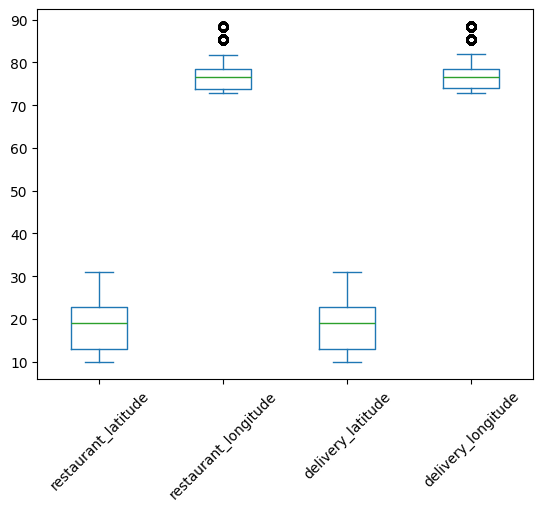

In [ ]:
# location columns
location_columns=location_subset.columns.tolist()
cleaned_data[location_columns].plot(kind="box")
plt.xticks(rotation=45)
display(cleaned_data[location_columns].describe())

In [ ]:
# values in categorical columns

cat_cols = cleaned_data.select_dtypes(include="object").columns.tolist()
for col in cat_cols:
    print(f"For {col} unique values are: {cleaned_data[col].unique()}",end="\n")

For rider_id unique values are: ['INDORES13DEL02 ' 'BANGRES18DEL02 ' 'BANGRES19DEL01 ' ...
 'KOCRES04DEL01 ' 'BHPRES06DEL03 ' 'GOARES03DEL03 ']
For weather unique values are: ['sunny' 'stormy' 'sandstorms' 'cloudy' 'fog' 'windy' nan]
For traffic unique values are: ['high' 'jam' 'low' 'medium' nan]
For type_of_order unique values are: ['snack' 'drinks' 'buffet' 'meal']
For type_of_vehicle unique values are: ['motorcycle' 'scooter' 'electric_scooter' 'bicycle']
For festival unique values are: ['no' 'yes' nan]
For city_type unique values are: ['urban' 'metropolitian' 'semi-urban' nan]
For city_name unique values are: ['INDO' 'BANG' 'COIMB' 'CHEN' 'HYD' 'RANCHI' 'MYS' 'DEH' 'KOC' 'PUNE'
 'LUDH' 'KNP' 'MUM' 'KOL' 'JAP' 'SUR' 'GOA' 'AURG' 'AGR' 'VAD' 'ALH' 'BHP']
For order_day_of_week unique values are: ['saturday' 'friday' 'tuesday' 'monday' 'sunday' 'wednesday' 'thursday']
For order_time_of_day unique values are: ['morning' 'evening' 'afternoon' 'night' 'after_midnight']


<Axes: >

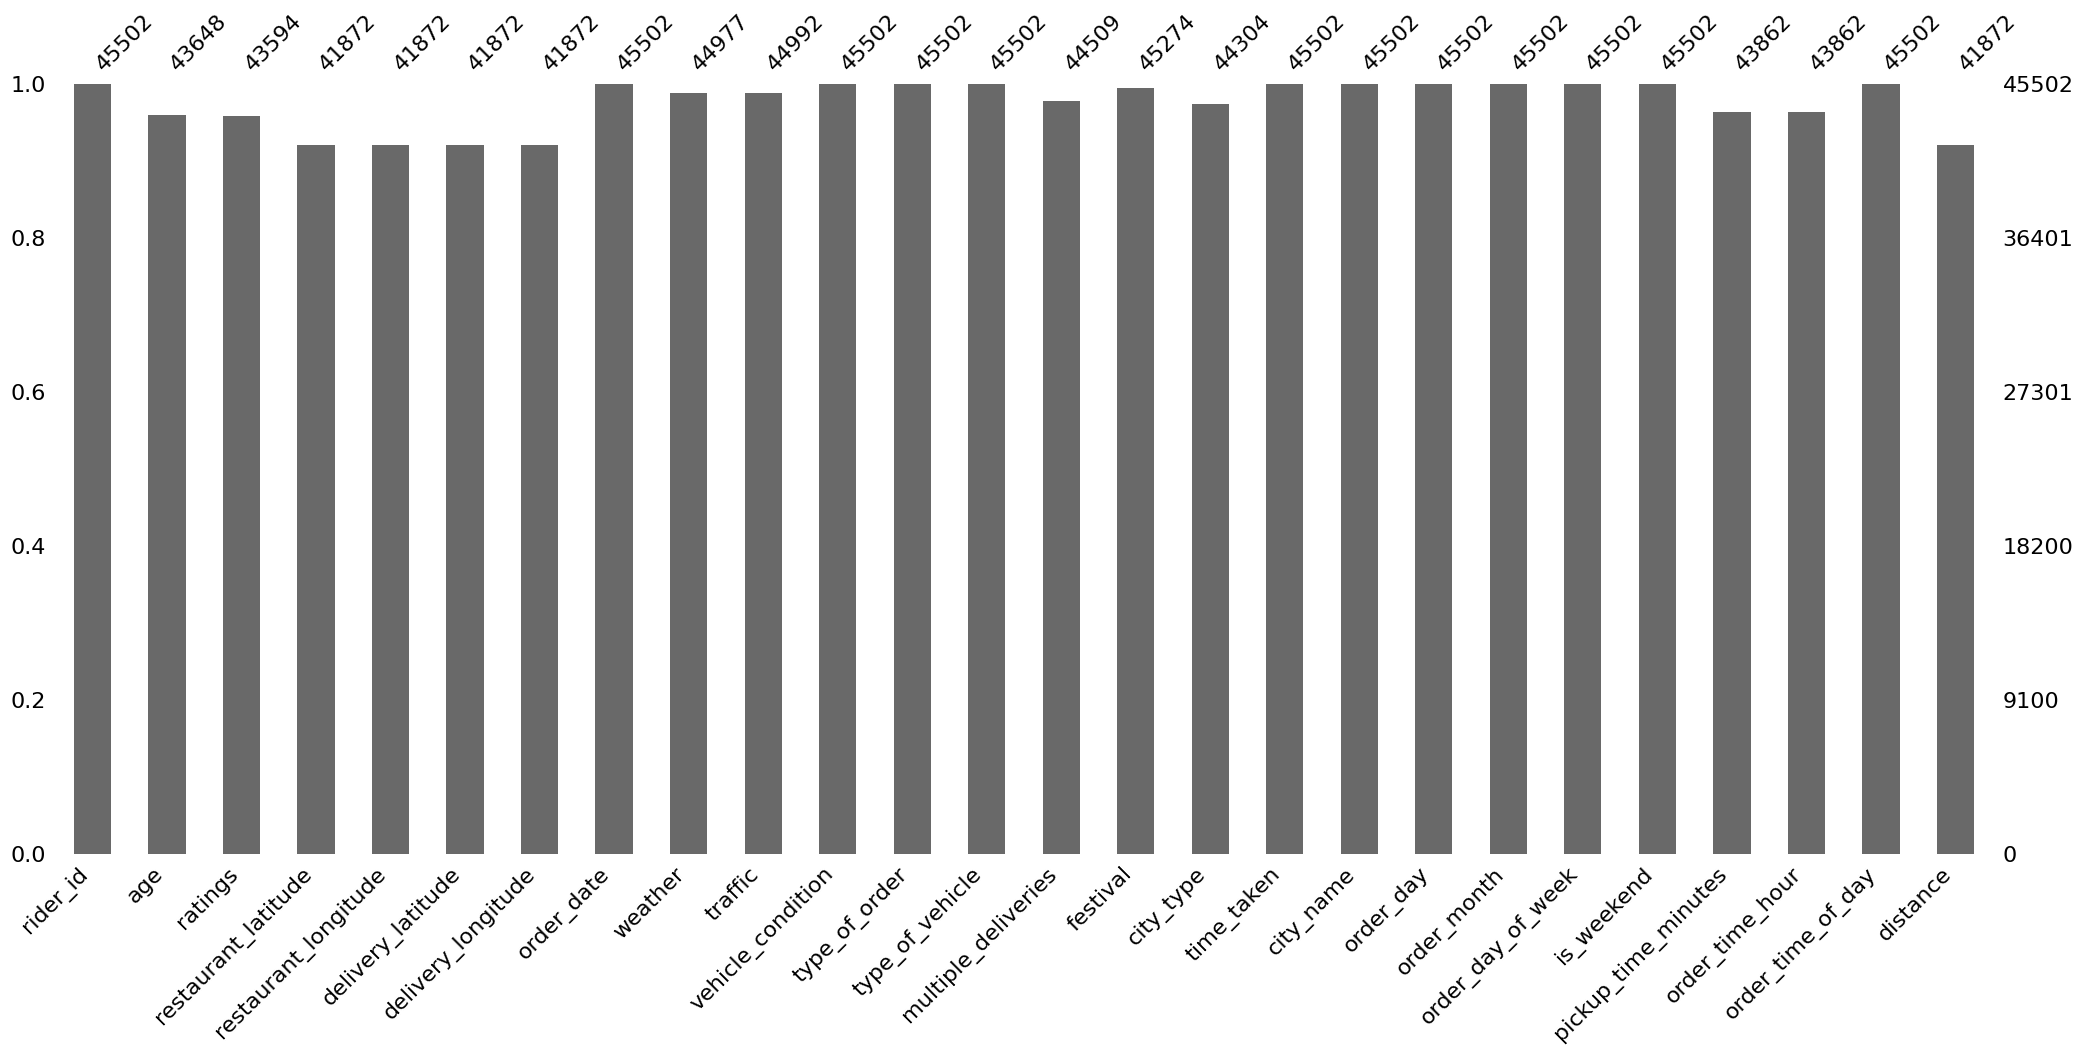

In [ ]:
msno.bar(cleaned_data)

<Axes: >

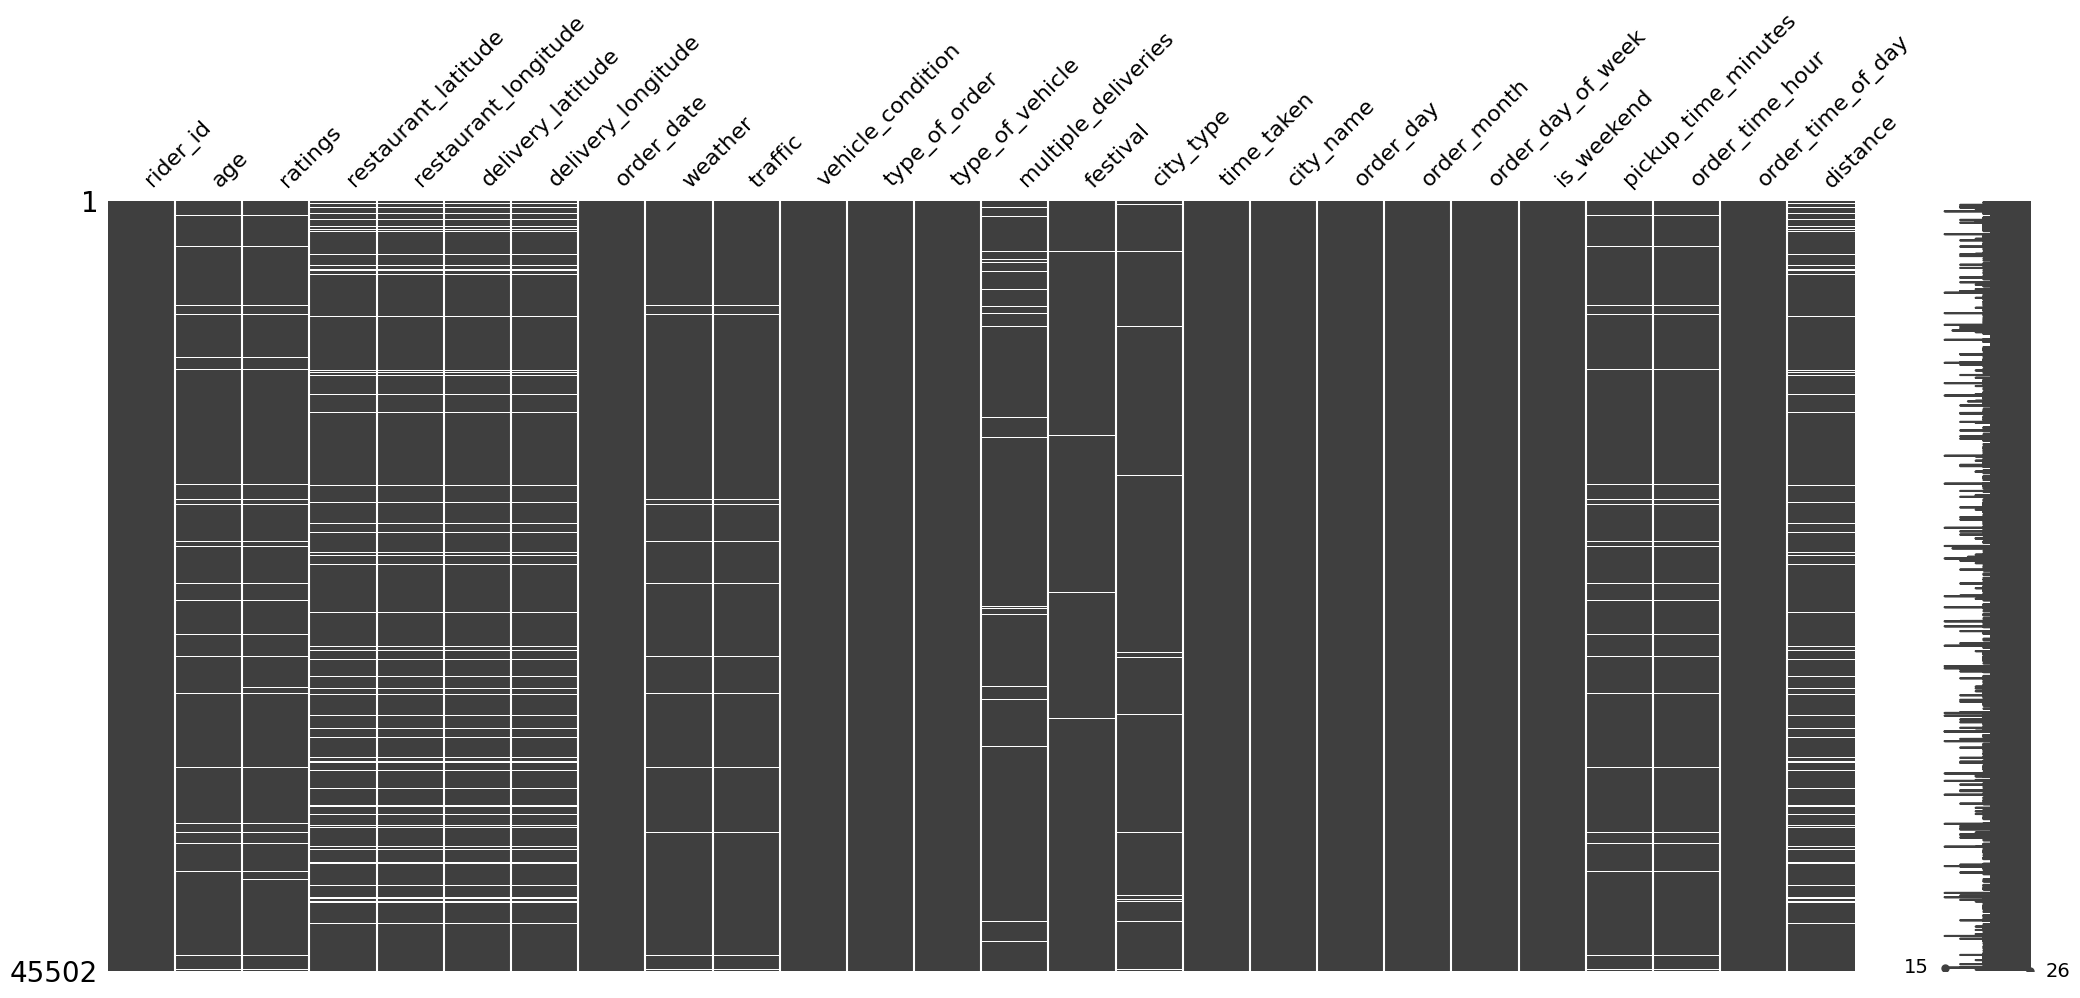

In [ ]:
msno.matrix(cleaned_data)

<Axes: >

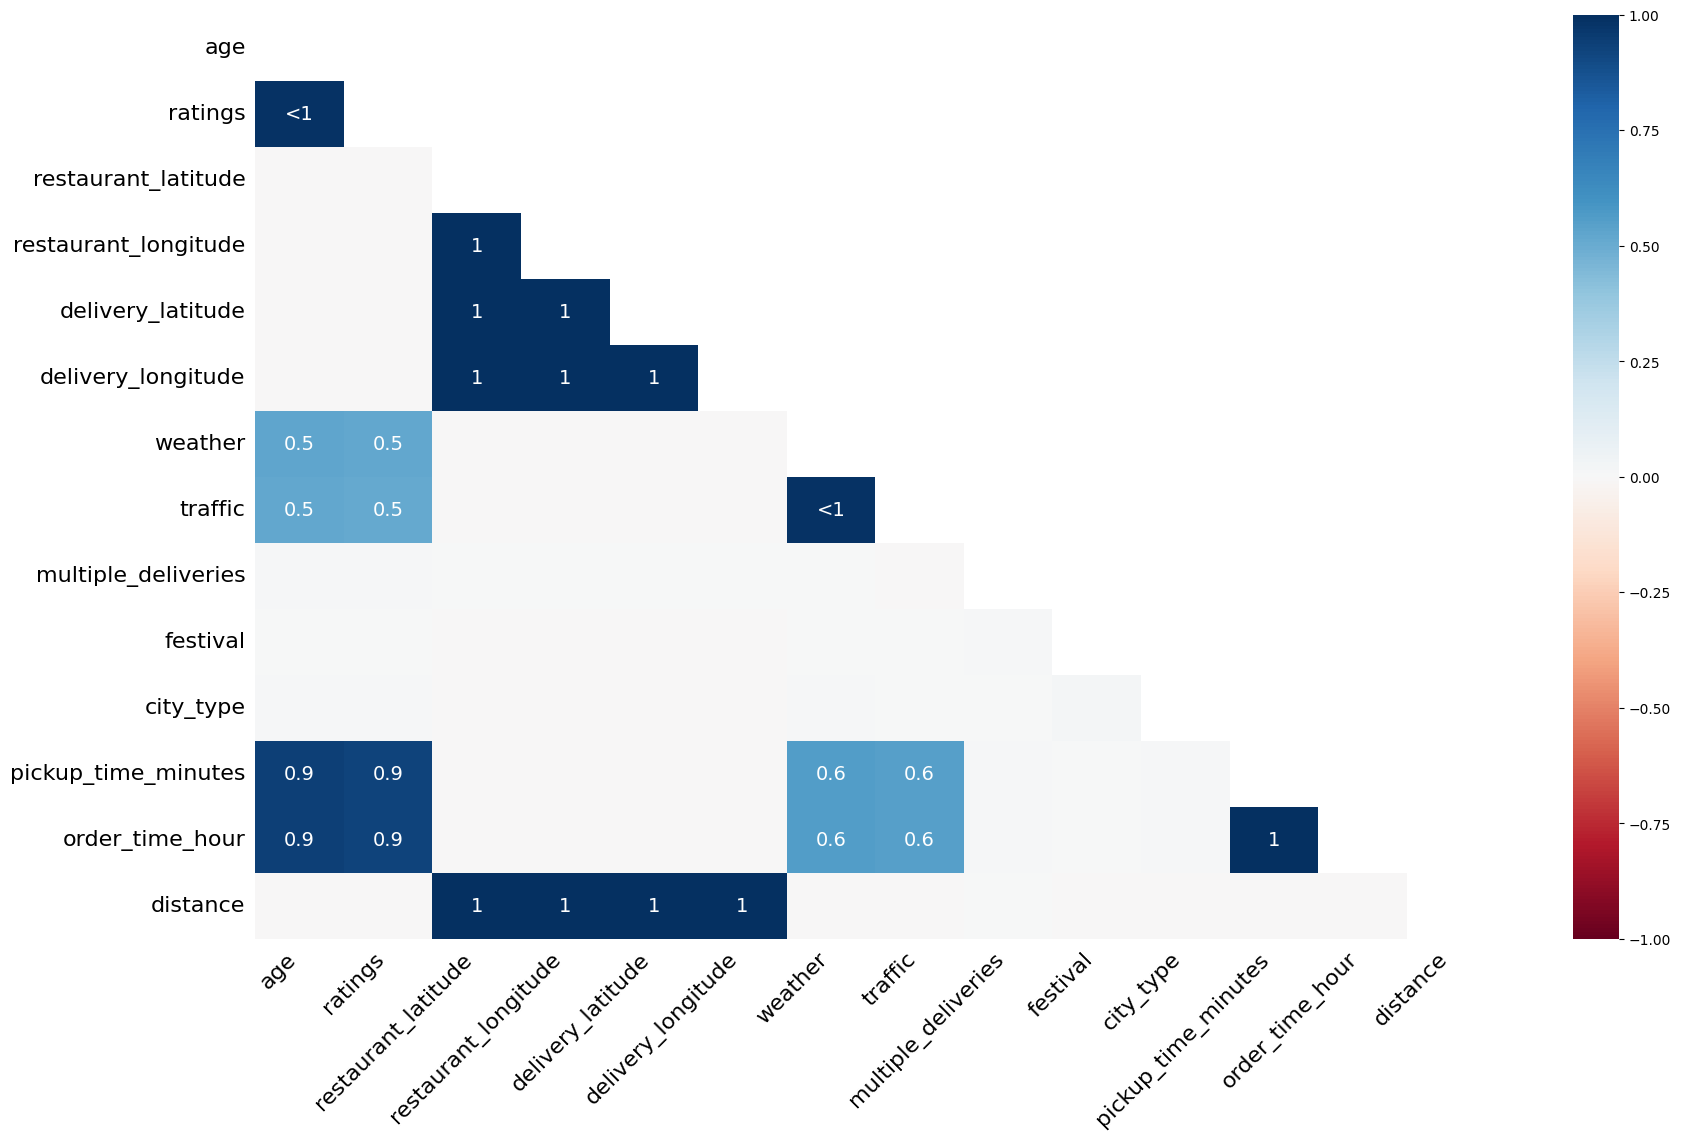

In [ ]:
msno.heatmap(cleaned_data)

In [ ]:
file_path = '/content/drive/MyDrive/food_delivery_time_prediction/cleaned_data.csv'
cleaned_data.to_csv(file_path, index=False)

In [ ]:
# load the cleaned data
cleaned_data_load = pd.read_csv("cleaned_data.csv")

In [ ]:
# data types of cleaned data
cleaned_data_load.dtypes

,0
rider_id,object
age,float64
ratings,float64
restaurant_latitude,float64
restaurant_longitude,float64
delivery_latitude,float64
delivery_longitude,float64
order_date,object
weather,object
traffic,object
